## Introduction

These are real world complaints received about products and services. Each complaint has been labeled with a specific product; therefore, this is a supervised text classification problem. With the aim to classify future complaints based on its content, you can use different deep learning algorithms to make predictions (i.e., classify the complaint in one of the product categories)

The goal here is to design some deep learning algorithms that classify complaints in one of the product categories.

## Data Import

In [ ]:
import pandas as pd
data1 = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/consumer_complaints1.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/consumer_complaints2.csv")
data3 = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/consumer_complaints3.csv")
data4 = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/consumer_complaints4.csv")

complaints = pd.concat([data1,data2,data3,data4],axis=0)
complaints.head(3)

,level_0,index,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,0,190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
1,1,190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
2,2,190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524


In [ ]:
df = complaints[['product','consumer_complaint_narrative']]
df.index = complaints['level_0']
df.head()

,product,consumer_complaint_narrative
level_0,,
0,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
1,Consumer Loan,Due to inconsistencies in the amount owed that...
2,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
3,Mortgage,I have an open and current mortgage with Chase...
4,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


## Product Distribution

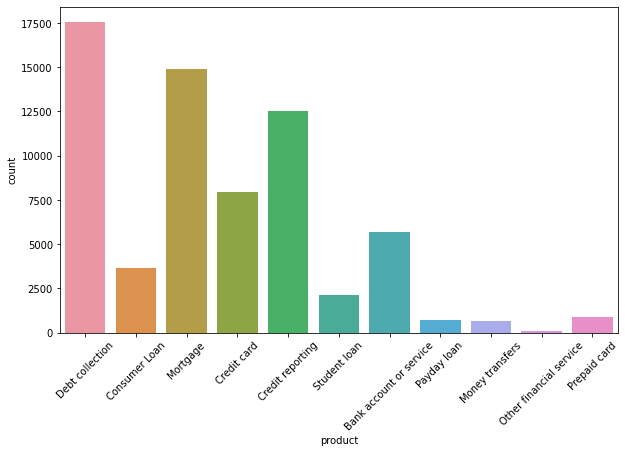

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import nltk, re
from wordcloud import WordCloud

plt.figure(figsize=(10,6))
plt.xticks(rotation = 45)
sns.countplot(x='product',data=df)

## Product encodage

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['product'].unique())

df['product'] = le.transform(df['product'])
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array(['Bank account or service', 'Consumer Loan', 'Credit card',
       'Credit reporting', 'Debt collection', 'Money transfers',
       'Mortgage', 'Other financial service', 'Payday loan',
       'Prepaid card', 'Student loan'], dtype=object)

## Text Cleaning

In [ ]:
import re

#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data


#Removes URL data
def _remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)


#Removes dups char
def _remove_dups_char(x):
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x


#Removes emails
def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)


def _remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [ ]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:str(x).replace('X', ''))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:str(x).lower().replace('_', ' '))

df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:remove_html(str(x)))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:_remove_urls(str(x)))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:remove_punctuations(str(x)))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:_remove_emails(str(x)))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:_remove_rt(str(x)))
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x:_remove_special_chars(str(x)))

In [ ]:
df.head()

,product,consumer_complaint_narrative
level_0,,
0,4,has claimed i owe them 2700 for years despite ...
1,1,due to inconsistencies in the amount owed that...
2,6,in my wages that i earned at my job decreased ...
3,6,i have an open and current mortgage with chase...
4,6,was submitted at the time i submitted this com...


## Text tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

X = [text.split() for text in list(df['consumer_complaint_narrative'])]
tokenizer.fit_on_texts(X)

XBIS = tokenizer.texts_to_sequences(X)
XTIER = pad_sequences(XBIS,maxlen=1000)

In [ ]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

67812


## Splitting the dataset

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_CAT = to_categorical(df['product'].values,num_classes=11)
Y_CAT

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XTIER,Y_CAT,test_size=0.25, random_state=42)

## Single LSTM Layer

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential

product_single = Sequential()
product_single.add(Embedding(input_dim=vocab_size,output_dim=100))
product_single.add(LSTM(units=128))
product_single.add(Dense(11,activation='softmax'))

product_single.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
product_single.fit(X_train,y_train,epochs=1)
product_single.evaluate(X_test,y_test)

522/522 [==============================] - 131s 250ms/step - loss: 1.0209 - acc: 0.6727


[1.0209169387817383, 0.6726739406585693]

In [ ]:
y_pred = product_single.predict(X_test)

In [ ]:
predict = np.argmax(y_pred, axis=1)
real = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score

print('There is ' + str(round(accuracy_score(predict,real)*100,2)) + ' % of good predictions on the test set.')

There is 67.27 % of good predictions on the test set.


### Predict one complaint in particular

In [ ]:
comp = df['consumer_complaint_narrative'][998]
comp = [comp.split()]
comp = tokenizer.texts_to_sequences(comp)
comp = pad_sequences(comp,maxlen=1000)

proba_predict = product_single.predict(comp)
print('COMPLAIN CHOOSEN : ' + df['consumer_complaint_narrative'][998]+'\n')
print("Real product : "+ str(le.inverse_transform([df['product'][998]])[0]) +", Predicted product : "+str(le.inverse_transform([np.argmax(proba_predict)])[0]))

COMPLAIN CHOOSEN : we received a tax abatement and our escrow payment and balance is not realistic for what needs to be paid the company will not review the escrow until sometime which is not fair this is frustrating because we pay on time and pay extra each month to reduce the principal

Real product : Mortgage, Predicted product : Mortgage


## Neural Network with multiple LSTM

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential


vocab_size = len(tokenizer.word_index)+1


multi_lstm = Sequential()
multi_lstm.add(Embedding(input_dim=vocab_size,output_dim=100))
multi_lstm.add(LSTM(50,return_sequences=True))
multi_lstm.add(Dropout(0.2))
multi_lstm.add(LSTM(32,return_sequences=True))
multi_lstm.add(BatchNormalization())
multi_lstm.add(LSTM(16))
multi_lstm.add(Dense(11,activation='softmax'))

multi_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
multi_lstm.fit(X_train,y_train,epochs=1)
multi_lstm.evaluate(X_test,y_test)

522/522 [==============================] - 115s 217ms/step - loss: 0.9621 - acc: 0.6938


[0.962141215801239, 0.6938091516494751]

In [ ]:
y_pred = multi_lstm.predict(X_test)

In [ ]:
predict = np.argmax(y_pred, axis=1)
real = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score

print('There is ' + str(round(accuracy_score(predict,real)*100,2)) + ' % of good predictions on the test set.')

There is 69.38 % of good predictions on the test set.


### Predict one complaint in particular

In [ ]:
comp = df['consumer_complaint_narrative'][992]
comp = [comp.split()]
comp = tokenizer.texts_to_sequences(comp)
comp = pad_sequences(comp,maxlen=1000)

proba_predict = multi_lstm.predict(comp)
print('COMPLAIN CHOOSEN : ' + df['consumer_complaint_narrative'][992]+'\n')
print("Real product : "+ str(le.inverse_transform([df['product'][992]])[0]) +", Predicted product : "+str(le.inverse_transform([np.argmax(proba_predict)])[0]))

COMPLAIN CHOOSEN : on 2015 i received a notice from equifa stating the following as you requested we successfully placed an initial fraud alert on your equifa credit line i have never requested equifa or any other bureau to place any such fraud alert on my report s by what right have they do even allege such a thing without my requesting it to be done

Real product : Credit reporting, Predicted product : Credit reporting


## CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D

embedding_dim = 100
vocab_size = vocab_size = len(tokenizer.word_index)+1


model_cnn = Sequential()
model_cnn.add(Embedding(input_dim= vocab_size, output_dim=embedding_dim, input_length=1000))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(11, activation='sigmoid'))

model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_cnn.fit(X_train,y_train,epochs=5)
model_cnn.evaluate(X_test,y_test)

Epoch 1/5
1566/1566 [==============================] - 567s 362ms/step - loss: 0.7584 - accuracy: 0.7623
Epoch 2/5
1566/1566 [==============================] - 563s 360ms/step - loss: 0.3947 - accuracy: 0.8803
Epoch 3/5
1566/1566 [==============================] - 560s 357ms/step - loss: 0.2560 - accuracy: 0.9226
Epoch 4/5
1566/1566 [==============================] - 566s 361ms/step - loss: 0.1416 - accuracy: 0.9596
Epoch 5/5
522/522 [==============================] - 44s 84ms/step - loss: 0.6158 - accuracy: 0.8536


[0.6158164739608765, 0.8536103367805481]

In [ ]:
print('There is ' + str(round(0.8536103367805481*100,2)) + ' % of good predictions on the test set.')

There is 85.36 % of good predictions on the test set.


### Predict one complaint in particular

In [ ]:
comp = df['consumer_complaint_narrative'][2002]
comp = [comp.split()]
comp = tokenizer.texts_to_sequences(comp)
comp = pad_sequences(comp,maxlen=1000)

proba_predict = model_cnn.predict(comp)
print('COMPLAIN CHOOSEN : ' + df['consumer_complaint_narrative'][2002]+'\n')
print("Real product : "+ str(le.inverse_transform([df['product'][2002]])[0]) +", Predicted product : "+str(le.inverse_transform([np.argmax(proba_predict)])[0]))

COMPLAIN CHOOSEN : wells fargo bank mastercard upon reissuing credit card changed my name on the new card without my authorization the name on the current card is not mine rendering the card useless after months of asking the bank staff local bank mamager finally ceo to correct the error back to my name they continue to require that i submit a written change of name authorization request which i refuse to do as it sets a dangerous precedent the bank refuses to admit their error and has so far refused to either provide me with a copy of a name change authorization that erroneously changed the name on my card or to correct the name back i m at the end of my rope and prepared to persue legal action against bank

Real product : Credit card, Predicted product : Credit card


## Bidirectional LSTM Layer

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

DIM = 100 #the size of the emdedding vectors
vocab_size = len(tokenizer.word_index)+1


bidirect_lstm = Sequential()
bidirect_lstm.add(Embedding(input_dim=vocab_size,output_dim=100,input_length=1000))
bidirect_lstm.add(Bidirectional(LSTM(128)))
bidirect_lstm.add(Dense(11,activation='softmax'))

bidirect_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
bidirect_lstm.fit(X_train,y_train,epochs=1)
bidirect_lstm.evaluate(X_test,y_test)

522/522 [==============================] - 219s 418ms/step - loss: 1.1626 - acc: 0.6450


[1.1626211404800415, 0.6449527144432068]

In [ ]:
print('There is ' + str(round(0.6449527144432068*100,2)) + ' % of good predictions on the test set.')

There is 64.5 % of good predictions on the test set.


### Predict one complaint in particular

In [ ]:
comp = df['consumer_complaint_narrative'][6000]
comp = [comp.split()]
comp = tokenizer.texts_to_sequences(comp)
comp = pad_sequences(comp,maxlen=1000)

proba_predict = bidirect_lstm.predict(comp)
print('COMPLAIN CHOOSEN : ' + df['consumer_complaint_narrative'][6000]+'\n')
print("Real product : "+ str(le.inverse_transform([df['product'][6000]])[0]) +", Predicted product : "+str(le.inverse_transform([np.argmax(proba_predict)])[0]))

COMPLAIN CHOOSEN : in i sold my interest in a company and divorced my husband who immediately moved back to he and the other partners kept the company alive while i bowed out of the picture completely on i received a letter from a collection agency stating i owe 7800000 on a line of credit they claimed i personally guaranteed they are unable to locate this supposed contract and are threatening to ruin my quite frankly perfect credit all for a debt that is not mine

Real product : Debt collection, Predicted product : Debt collection


## Conclusion

To conclude, the CNN model appears to make better predictions than other models using LSTM, with an accuracy of 85% on the test set, which is promising. Therefore, this model will be retained for this project and future complaints about upcoming products.